In [1]:
# ================================================================
# 🔥 San Diego Fire Incidents (2020–2025)
# Full EDA + Visualization + Auto-Save Charts + Clean Export
# Author: Mohamed Emad Alhadi
# ================================================================

In [2]:
# ---------------------------------------------------------------
# 1️⃣ Import libraries
# ---------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# ---------------------------------------------------------------
# 2️⃣ Setup & Style
# ---------------------------------------------------------------
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

# Create folder for charts
os.makedirs("charts", exist_ok=True)

In [4]:
# ---------------------------------------------------------------
# 3️⃣ Load dataset
# ---------------------------------------------------------------
df = pd.read_csv("fd_incidents_all.csv")

print("✅ Data Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(df.head(3))

✅ Data Loaded Successfully!
Rows: 1028233, Columns: 15
  agency_type               call_category address_city jurisdiction  \
0        Fire  Emergency Medical Response    SAN DIEGO    San Diego   
1        Fire  Emergency Medical Response    SAN DIEGO    San Diego   
2        Fire                      HAZARD    SAN DIEGO    San Diego   

                      problem                date_response address_state  \
0  Emergency Medical Response  2020-12-30 23:57:19.0000000            CA   
1  Emergency Medical Response  2020-12-30 23:56:13.0000000            CA   
2                      HAZARD  2020-12-30 23:50:46.0000000            CA   

   address_zip  day_response  month_response  year_response weekday_name  \
0      92106.0            30              12           2020    Wednesday   
1      92127.0            30              12           2020    Wednesday   
2      92122.0            30              12           2020    Wednesday   

   hour_of_day category_group  season  
0         

In [5]:
# ---------------------------------------------------------------
# 4️⃣ Data Cleaning
# ---------------------------------------------------------------
df["date_response"] = pd.to_datetime(df["date_response"], errors="coerce")
df.dropna(subset=["date_response", "call_category"], inplace=True)
df["call_category"] = df["call_category"].str.title()
df["agency_type"] = df["agency_type"].str.upper()
df["address_zip"] = df["address_zip"].astype(str)

In [6]:
# ---------------------------------------------------------------
# 4️⃣ Data Cleaning
# ---------------------------------------------------------------
df["date_response"] = pd.to_datetime(df["date_response"], errors="coerce")
df.dropna(subset=["date_response", "call_category"], inplace=True)
df["call_category"] = df["call_category"].str.title()
df["agency_type"] = df["agency_type"].str.upper()
df["address_zip"] = df["address_zip"].astype(str)

In [7]:
# Group call categories into broader groups
def group_category(cat):
    if "Life" in cat:
        return "Life-Threatening"
    elif "Non" in cat:
        return "Non-Life-Threatening"
    elif "Urgent" in cat:
        return "Urgent"
    elif "Hazard" in cat:
        return "Hazard"
    else:
        return "Other"

df["category_group"] = df["call_category"].apply(group_category)

In [8]:
# ---------------------------------------------------------------
# 6️⃣ General Overview
# ---------------------------------------------------------------
print("\n🧾 Data Summary:")
print(df.describe(include='all'))
print("\n🧮 Missing Values:")
print(df.isna().sum())


🧾 Data Summary:
       agency_type                        call_category address_city  \
count      1028233                              1028233      1028233   
unique           1                                   12            2   
top           FIRE  Life-Threatening Emergency Response    SAN DIEGO   
freq       1028233                               532385      1028228   
mean           NaN                                  NaN          NaN   
min            NaN                                  NaN          NaN   
25%            NaN                                  NaN          NaN   
50%            NaN                                  NaN          NaN   
75%            NaN                                  NaN          NaN   
max            NaN                                  NaN          NaN   
std            NaN                                  NaN          NaN   

       jurisdiction                              problem  \
count       1028233                              1028233  

In [9]:
# ---------------------------------------------------------------
# 7️⃣ Visualization Section
# ---------------------------------------------------------------

def save_fig(name):
    """Helper function to save all figures automatically."""
    path = os.path.join("charts", f"{name}.png")
    plt.savefig(path, bbox_inches='tight')
    print(f"💾 Chart saved: {path}")

💾 Chart saved: charts\incidents_by_year.png


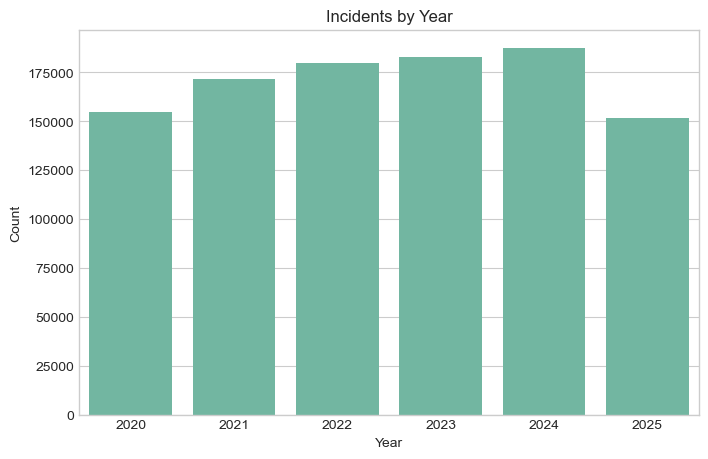

In [10]:
# ---------------------------------------------------------------
# (1) Incidents by Year
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x="year_response", data=df)
plt.title("Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Count")
save_fig("incidents_by_year")
plt.show()

💾 Chart saved: charts\incidents_by_month.png


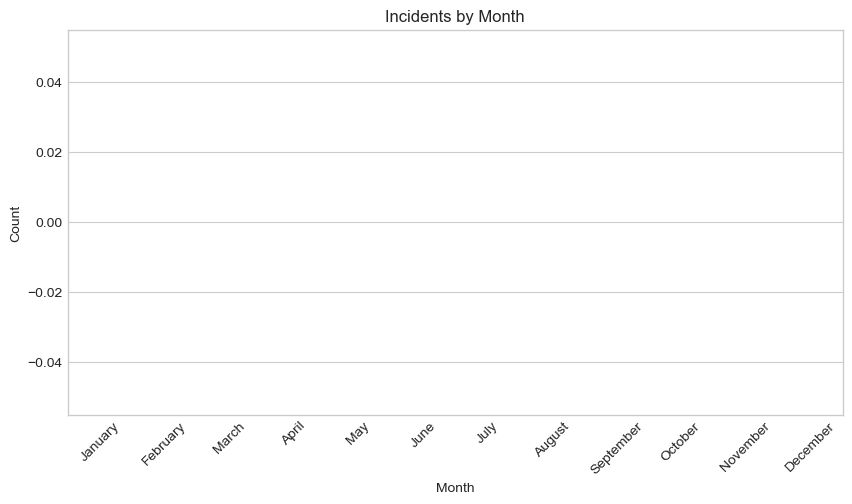

In [13]:
# ---------------------------------------------------------------
# (2) Incidents by Month
# ---------------------------------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(x="month_response", data=df, order=pd.date_range("2020-01","2020-12",freq="MS").month_name())
plt.title("Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
save_fig("incidents_by_month")
plt.show()

💾 Chart saved: charts\incidents_by_weekday.png


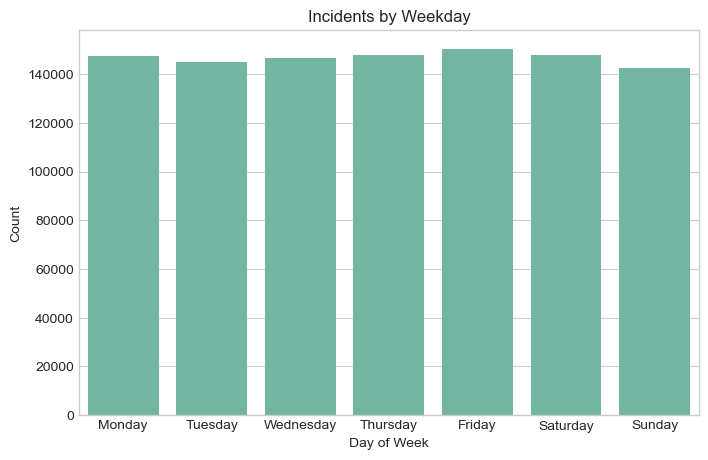

In [14]:
# ---------------------------------------------------------------
# (3) Incidents by Day of Week
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x="weekday_name", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Incidents by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Count")
save_fig("incidents_by_weekday")
plt.show()

💾 Chart saved: charts\hourly_distribution.png


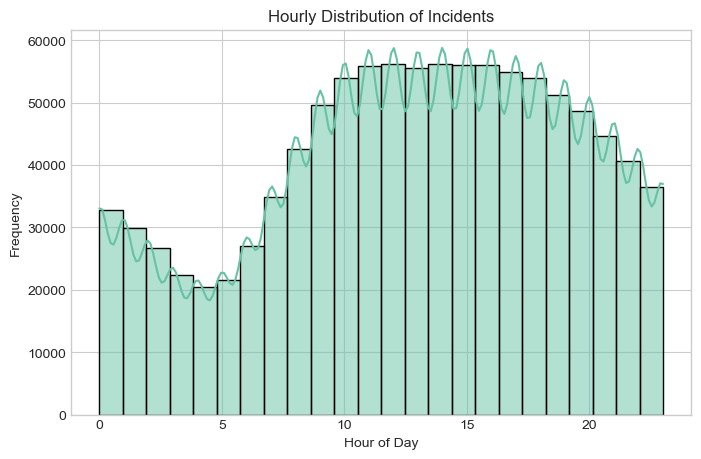

In [15]:
# ---------------------------------------------------------------
# (4) Hourly Trend
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["hour_of_day"], bins=24, kde=True)
plt.title("Hourly Distribution of Incidents")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
save_fig("hourly_distribution")
plt.show()

💾 Chart saved: charts\incident_types_distribution.png


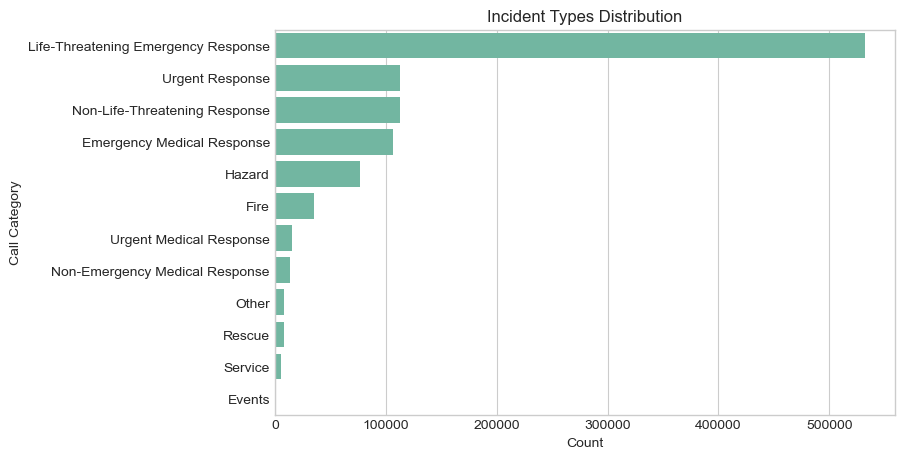

In [16]:
# ---------------------------------------------------------------
# (5) Category Distribution
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(y="call_category", data=df, order=df["call_category"].value_counts().index)
plt.title("Incident Types Distribution")
plt.xlabel("Count")
plt.ylabel("Call Category")
save_fig("incident_types_distribution")
plt.show()

💾 Chart saved: charts\category_by_season.png


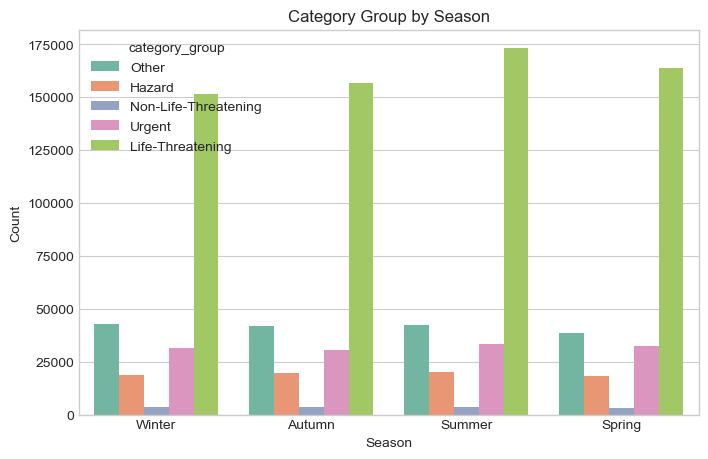

In [17]:
# ---------------------------------------------------------------
# (6) Category Group vs Season
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="season", hue="category_group")
plt.title("Category Group by Season")
plt.xlabel("Season")
plt.ylabel("Count")
save_fig("category_by_season")
plt.show()

💾 Chart saved: charts\category_by_year.png


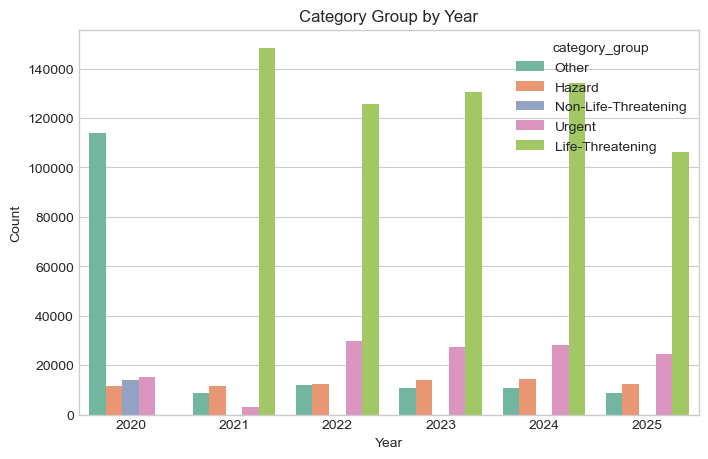

In [18]:
# ---------------------------------------------------------------
# (7) Category Group by Year
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="year_response", hue="category_group")
plt.title("Category Group by Year")
plt.xlabel("Year")
plt.ylabel("Count")
save_fig("category_by_year")
plt.show()

💾 Chart saved: charts\top_zip_codes.png


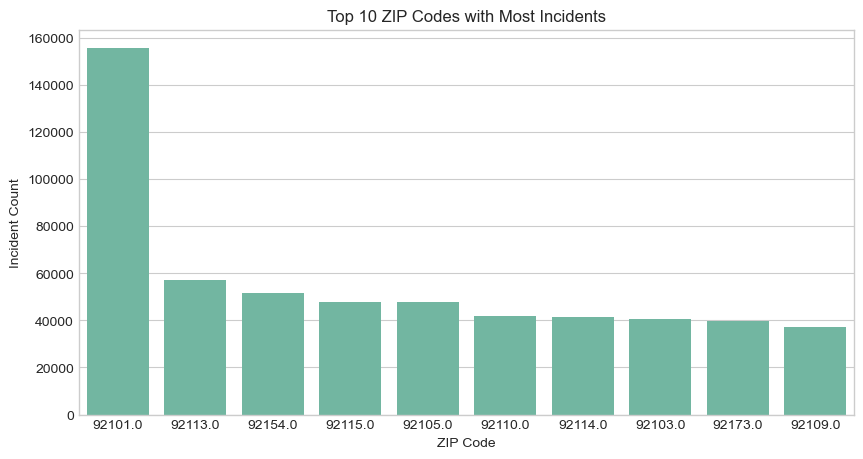

In [19]:
# ---------------------------------------------------------------
# (8) Incidents by ZIP Code
# ---------------------------------------------------------------
top_zip = df["address_zip"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_zip.index, y=top_zip.values)
plt.title("Top 10 ZIP Codes with Most Incidents")
plt.xlabel("ZIP Code")
plt.ylabel("Incident Count")
save_fig("top_zip_codes")
plt.show()

💾 Chart saved: charts\monthly_trend_by_year.png


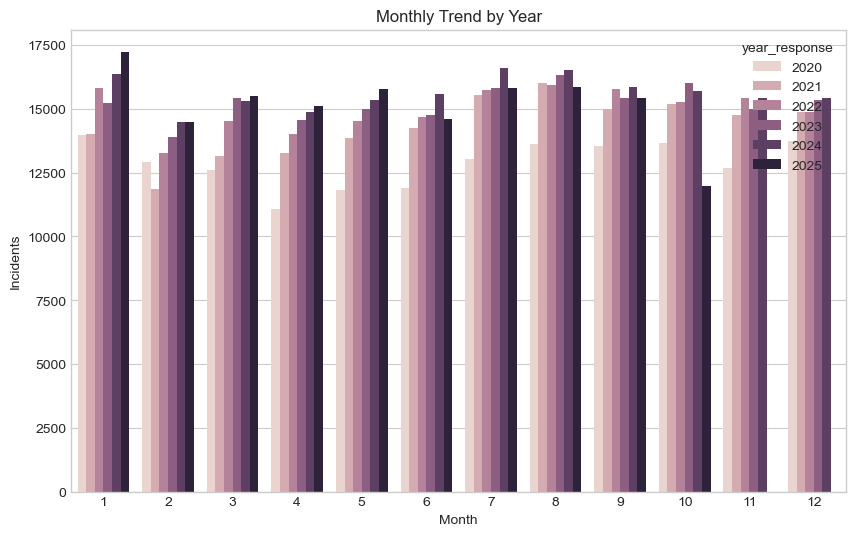

In [20]:
# ---------------------------------------------------------------
# (9) Monthly Trend per Year
# ---------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.countplot(x="month_response", hue="year_response", data=df)
plt.title("Monthly Trend by Year")
plt.xlabel("Month")
plt.ylabel("Incidents")
save_fig("monthly_trend_by_year")
plt.show()

💾 Chart saved: charts\heatmap_hour_weekday.png


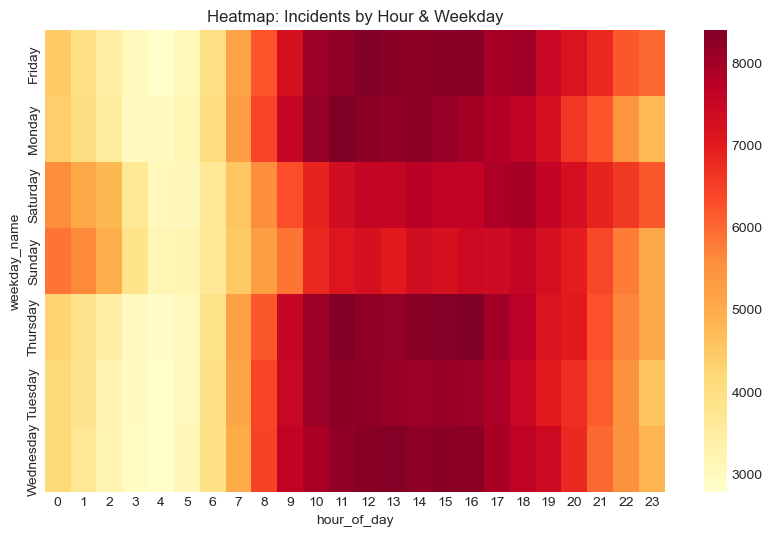

In [21]:
# ---------------------------------------------------------------
# (10) Heatmap: Hour vs Weekday
# ---------------------------------------------------------------
plt.figure(figsize=(10,6))
heat_data = df.groupby(["weekday_name","hour_of_day"]).size().unstack()
sns.heatmap(heat_data, cmap="YlOrRd")
plt.title("Heatmap: Incidents by Hour & Weekday")
save_fig("heatmap_hour_weekday")
plt.show()

💾 Chart saved: charts\seasonal_comparison_by_year.png


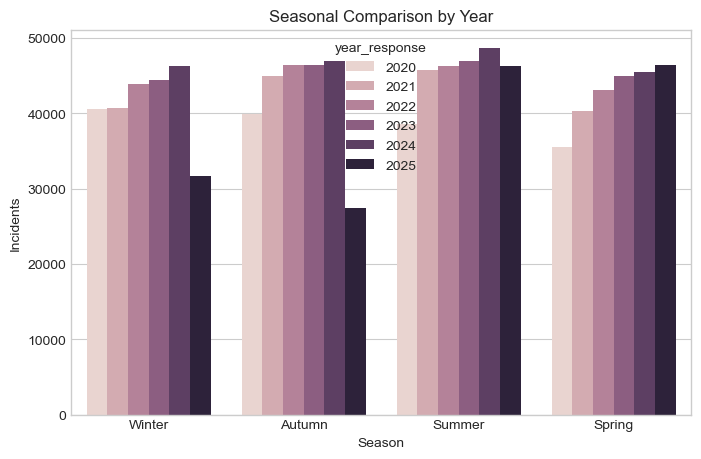

In [23]:
#---------------------------------------------------------------
# (11) Yearly Season Comparison
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="season", hue="year_response")
plt.title("Seasonal Comparison by Year")
plt.xlabel("Season")
plt.ylabel("Incidents")
save_fig("seasonal_comparison_by_year")
plt.show()

💾 Chart saved: charts\agency_type_distribution.png


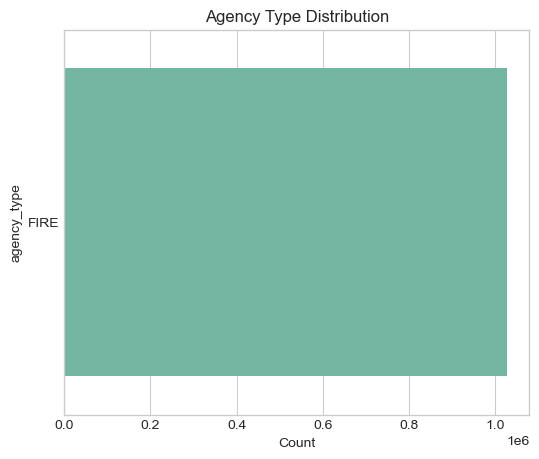

In [24]:
# ---------------------------------------------------------------
# (12) Distribution by Agency Type
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
sns.countplot(data=df, y="agency_type")
plt.title("Agency Type Distribution")
plt.xlabel("Count")
save_fig("agency_type_distribution")
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_15068\4132589538.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("date_response").resample("M")["call_category"].count().plot()


💾 Chart saved: charts\monthly_trend_over_time.png


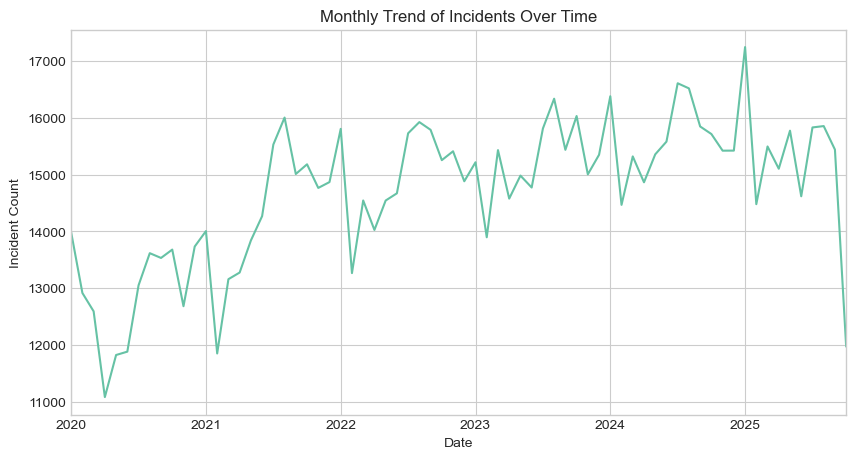

In [25]:
# ---------------------------------------------------------------
# (13) Trendline Over Time (if date continuous)
# ---------------------------------------------------------------
plt.figure(figsize=(10,5))
df.set_index("date_response").resample("M")["call_category"].count().plot()
plt.title("Monthly Trend of Incidents Over Time")
plt.xlabel("Date")
plt.ylabel("Incident Count")
save_fig("monthly_trend_over_time")
plt.show()

💾 Chart saved: charts\pie_category_group.png


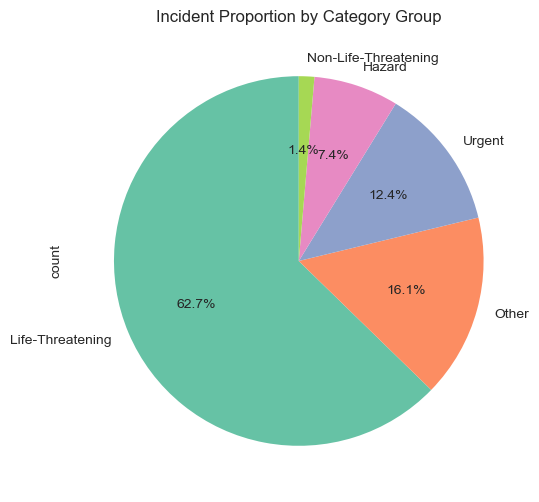

In [26]:
# ---------------------------------------------------------------
# (14) Pie Chart - Category Group %
# ---------------------------------------------------------------
plt.figure(figsize=(6,6))
df["category_group"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Incident Proportion by Category Group")
save_fig("pie_category_group")
plt.show()

In [27]:
# ---------------------------------------------------------------
# 8️⃣ Export Clean Dataset
# ---------------------------------------------------------------
df.to_csv("fd_incidents_clean.csv", index=False)
print("\n💾 Clean dataset exported successfully: fd_incidents_clean.csv")


💾 Clean dataset exported successfully: fd_incidents_clean.csv
